<a href="https://colab.research.google.com/github/MohitPunasiya/EE_769-Introduction-to-ML/blob/main/A1_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 
4. Write your names here: 
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [ ]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    return((X-X.mean(axis=0))/X.std(axis=0))  #X.mean to take means along columns and X.std to take SD along columns
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [ ]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1)) #creating an array of (m*1) of all ones, with same number of raws(m) 
    X = np.hstack((X,ones))        #stacking ones horizontally to X to make coefficient of bias weight as 1
    y = X.dot(w)                   #Getting the prediction, through multiplying each data point to corresponding weights
    return(y)                      #returning the vector y
    #raise NotImplementedError()


In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [ ]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1))
    X = np.hstack((X,ones))                   #stacking ones horizontally to X to make coefficient of bias weight as 1
    MSE_loss = np.sum((t - X.dot(w))**2) / X.shape[0]   #Calculating mean square error losses
    return(MSE_loss)
    raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [ ]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1))  
    X = np.hstack((X,ones))    #stacking ones horizontally to X to make coefficient of bias weight as 1
    MAE_loss = np.sum(abs(t - X.dot(w))) / X.shape[0]  #Calculating mean absolute error, X.shape[0] gives the number of data points
    return(MAE_loss) 
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [ ]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1))
    X = np.hstack((X,ones))
    MSE_loss = np.sum((t - X.dot(w))**2) / X.shape[0] 
    #L2_regulatisation loss = MSE loss + reglarisation term |Thetha|
    L2_loss = MSE_loss + lamda*(np.sum((w[:-1])**2)**0.5) #bias term is not regularised
    return(L2_loss)
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [ ]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1))
    X = np.hstack((X,ones))
    MSE_loss = np.sum((t - X.dot(w))**2) / X.shape[0] #Calculating MSE_loss
    #L1 loss = MSE loss + reglarisation term |weights| except bias term
    L1_loss = MSE_loss + lamda*(np.sum(abs(w[:-1])))
    return(L1_loss)
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [ ]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1))
    X = np.hstack((X,ones))    #stacking ones horizontally to X to make coefficient of bias weight as 1
    NRMSE = ((np.sum((t-X.dot(w))**2)/t.shape[0])**0.5)/ t.std() #calculating NRMSE which is (RMSE)/(standard deviation of observations)
    return(NRMSE)
    #raise NotImplementedError()
    ##Reference take : https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [ ]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1)) 
    X = np.hstack((X,ones))            #stacking vector of all ones to make coefficient of bias term 1
    Gradient = np.ones(w.shape[0])     #creating another vector to store the gradients corresponding to each weight
    for i in range(w.shape[0]):        #setting loop to go for all weights
        Gradient[i]=(2/X.shape[0])*np.sum((X.dot(w)-t)*X[:,i])  #This is the formulae of gradient
    return(Gradient)                   #returning vector of gradient
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [ ]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1))
    X = np.hstack((X,ones))  #stacking ones as last column
    gradient = (1/t.shape[0])*np.dot(X.T,np.sign(np.dot(X,w)-t))   #MAE Gradient formula
    return(gradient)
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [ ]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    #L2 gradient will be MSE gradient + lamda* gradient of regularisation term,without bias term
    MSE_grad = MSE_Gradient(X,t,w)  #calling MSE Gradient function to get Gradient vector of MSE part in loss function
    L2_Gradient= np.append(MSE_grad[:-1]+(lamda/np.sqrt(np.sum(w[:-1]**2)))*w[:-1],[MSE_grad[-1]])  #Adding gradient of regularisation term for all terms except bias of regularised term, MSE bias element has been appended later
    return(L2_Gradient) #returning the Vector
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [ ]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    MSE_grad = MSE_Gradient(X,t,w)  #calling MSE Gradient function to get Gradient vector of MSE part in loss function
    L1_Gradient= np.append(MSE_grad[:-1]+lamda*np.sign(w[:-1]),[MSE_grad[-1]]) #Adding gradient of regularisation term for all terms except bias of regularised term, MSE bias element has been appended later
    return(L1_Gradient)
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [ ]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    w_prev = np.zeros(w.shape[0])  #initialising with zero weights
    i = 0 
    while abs(lossfunc(X,t,w_prev,lamda)- lossfunc(X,t,w,lamda)) >= epsilon and i <= max_iter :
                      w_prev = w
                      w = w - lr*gradfunc(X,t,w,lamda)
                      i = i + 1
    
    w_final = w
    train_loss_final = lossfunc(X,t,w_final,lamda)              #storing training loss
    validation_loss_final = lossfunc(X_val,t_val,w_final,lamda) #storing validation loss
    validation_NRMSE = NRMSE_Metric(X_val,t_val,w_final)        #storing Validation NRMSE
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [ ]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    ones = np.ones((X.shape[0],1)) 
    X = np.hstack((X,ones))
    n = X.shape[1]
    w = np.dot(np.linalg.pinv(np.dot(X.T,X) +lamda * np.eye(n)),np.dot(X.T,t))
    return(w)
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [ ]:
df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv')

In [ ]:
'''This code block splits data in training and validation set by randomisation each time when we run this block
   training and validation data changes, training and validation data does not overlap anywhere'''

train_size = 0.7  #input traininig data size
X_TrainSample = df.sample(int(df.shape[0]*train_size)) #Taking random sample values of training data size from our whole data
X_train = Normalize(X_TrainSample.drop(['Next_Tmax'],axis = 1)).to_numpy()  #Taking all X columns from our training data and converting DataFrame to np arrray after normalising X
t_train = X_TrainSample['Next_Tmax'].to_numpy()   #Taking out corresponding true values for training set
X_ValSample = df.drop(X_TrainSample.index,axis = 0) #Taking out validation data this excludes all the rows which we had taken for training
X_val = Normalize(X_ValSample.drop(['Next_Tmax'],axis = 1)).to_numpy() #Getting Validation X
t_val = X_ValSample['Next_Tmax'].to_numpy()  #Getting true observation for reliability
wL2 = np.ones(df.shape[1])  #initialising with weights for

# Best Lamda for L2 Regularisation

In [ ]:
lamdas = np.arange(0.01,1,0.01) #getting an array of lamdas to try
Array_final_L2 = np.ones((len(lamdas),22+3+2)) #creating an numpy array to store everything corresponding to lamdas
for i,lamda in enumerate(lamdas):    
    results = Gradient_Descent (X_train, X_val, t_train, t_val, wL2, lamda,200 ,1e-10, 1e-1, L2_Loss, L2_Gradient)
    Array_final_L2[i,:22] = results[0]     #storing weights in array
    Array_final_L2[i,22:25] = results[1:4] #Storing TrainLoss ValLoss and NRMSE in array
    Array_final_L2[i,25:] = MSE_Loss(X_train,t_train,results[0]) , MSE_Loss(X_val,t_val,results[0]) ##storing MSE traning and validation loss

In [ ]:
columns_name = ['w'+str(i) for i in np.arange(22)] + [ 'train_loss_final',' validation_loss_final', 'validation_NRMSE','MSE_Train_loss','MSE_val_loss']
Final_DataFrame_L2 = pd.DataFrame(Array_final_L2,lamdas,columns_name) #the above line is to create column name and this line create a data frame which is shown below

In [ ]:
Final_DataFrame_L2

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w17,w18,w19,w20,w21,train_loss_final,validation_loss_final,validation_NRMSE,MSE_Train_loss,MSE_val_loss
0.01,0.525534,0.099767,0.388369,-0.101826,1.807435,0.257393,-0.400126,0.245363,-0.314813,-0.250592,...,-0.120636,-0.212789,0.286804,0.042081,30.273737,2.026130,1.970650,0.463416,2.005057,1.949578
0.02,0.523812,0.102426,0.369553,-0.099252,1.780203,0.274447,-0.400321,0.245546,-0.316303,-0.251241,...,-0.118989,-0.210539,0.284756,0.044200,30.273737,2.047357,1.990695,0.463354,2.005720,1.949057
0.03,0.522183,0.105152,0.351388,-0.096805,1.753751,0.290748,-0.400490,0.245659,-0.317699,-0.251870,...,-0.117360,-0.208248,0.282638,0.046242,30.273737,2.068300,2.010493,0.463320,2.006573,1.948766
0.04,0.520643,0.107937,0.333866,-0.094481,1.728074,0.306311,-0.400634,0.245705,-0.319002,-0.252481,...,-0.115749,-0.205922,0.280456,0.048207,30.273737,2.088971,2.030057,0.463310,2.007601,1.948687
0.05,0.519190,0.110773,0.316977,-0.092278,1.703165,0.321150,-0.400752,0.245686,-0.320215,-0.253073,...,-0.114156,-0.203567,0.278216,0.050096,30.273737,2.109385,2.049399,0.463324,2.008789,1.948802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,0.481403,0.279272,-0.115455,-0.075234,0.902984,0.555829,-0.353274,0.185763,-0.301924,-0.260546,...,-0.037063,-0.082241,0.120655,0.072948,30.273737,3.541342,3.428283,0.482568,2.227107,2.114048
0.96,0.481031,0.279979,-0.116503,-0.075492,0.899678,0.555313,-0.352541,0.185156,-0.301442,-0.260402,...,-0.036628,-0.081781,0.119681,0.072666,30.273737,3.555162,3.441612,0.482821,2.229815,2.116265
0.97,0.480656,0.280670,-0.117531,-0.075749,0.896410,0.554788,-0.351809,0.184552,-0.300962,-0.260257,...,-0.036197,-0.081330,0.118716,0.072382,30.273737,3.568954,3.454913,0.483075,2.232530,2.118489
0.98,0.480279,0.281346,-0.118538,-0.076005,0.893178,0.554254,-0.351077,0.183952,-0.300482,-0.260111,...,-0.035772,-0.080888,0.117762,0.072096,30.273737,3.582717,3.468185,0.483329,2.235253,2.120721


Text(0, 0.5, 'Losses')

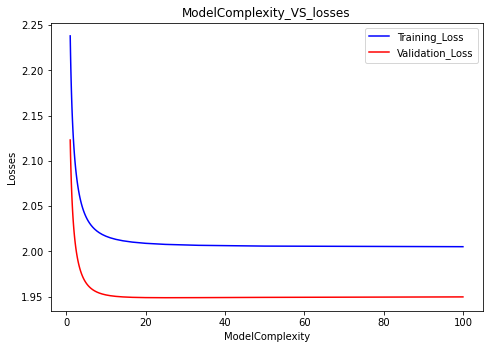

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.reciprocal(lamdas),Final_DataFrame_L2[:]['MSE_Train_loss'],'-b', label='Training_Loss')
ax.plot(np.reciprocal(lamdas),Final_DataFrame_L2[:]['MSE_val_loss'],'r', label='Validation_Loss')
ax.legend()
plt.title('ModelComplexity_VS_losses')
plt.xlabel('ModelComplexity')
plt.ylabel('Losses')

In [ ]:
print('Minimum training loss(RMSE) : ', min(Final_DataFrame_L2[:]['MSE_Train_loss'])**0.5,'\nMinimum Validation Loss (RMSE) : ', min(Final_DataFrame_L2[:]['MSE_val_loss'])**0.5)  #finding minimum traning and validation losses in all lamda 
print('Corresponding Minimum NRMSE ', min(Final_DataFrame_L2[:]['validation_NRMSE'])) #printing minimum NRMSE
print('Corresponding weights considering minimum val loss\n',Final_DataFrame_L2.iloc[np.argmin(Final_DataFrame_L2[:]['MSE_val_loss']), 0:22]) #printing weights corresponding to minimum validation loss 
print('Best Lamda ',lamdas[np.argmin(Final_DataFrame_L2[:]['MSE_val_loss'])]) #printing best lamda which gives minimum validation loss
wL2 = Final_DataFrame_L2.iloc[np.argmin(Final_DataFrame_L2[:]['MSE_val_loss']), 0:22].values #storing this weights to wL1 so if we rerun this weights be taken for intialistion in gradient descent


Minimum training loss(RMSE) :  1.4160002967880119 
Minimum Validation Loss (RMSE) :  1.3959536676310509
Corresponding Minimum NRMSE  0.46331043216992507
Corresponding weights considering minimum val loss
 w0      0.520643
w1      0.107937
w2      0.333866
w3     -0.094481
w4      1.728074
w5      0.306311
w6     -0.400634
w7      0.245705
w8     -0.319002
w9     -0.252481
w10    -0.107423
w11    -0.265019
w12    -0.048411
w13     0.213382
w14    -0.012165
w15    -0.014548
w16    -0.042971
w17    -0.115749
w18    -0.205922
w19     0.280456
w20     0.048207
w21    30.273737
Name: 0.04, dtype: float64
Best Lamda  0.04


In [ ]:
#pd.DataFrame(wL2).to_csv('BestModelWeights.csv',index = False)  ##saving weights for reference

# Best lamda for L1 Regularisation

In [ ]:
wL1 = np.ones(df.shape[1]) ##Initialising with some weights,, we run it for first time only 
                           #after initialising with some value, we save and input the new best weights for rerun

In [ ]:
lamdas1 = np.arange(0.0,1,0.01) #getting an array of lamdas to try for
Array_final_L1 = np.ones((len(lamdas1),22+3+2)) #creating an array matrix to store everything
for i,lamda in enumerate(lamdas1):
    result = Gradient_Descent (X_train, X_val, t_train, t_val, wL1, lamda,200 ,1e-10, 1e-1, L1_Loss, L1_Gradient)
    Array_final_L1[i,:22] = result[0]     #storing weights 
    Array_final_L1[i,22:25] = result[1:4] #Storing TrainLoss ValLoss and NRMSE 
    Array_final_L1[i,25:] = MSE_Loss(X_train,t_train,result[0]) , MSE_Loss(X_val,t_val,result[0]) #storing MSE Loss for traning and validation


In [ ]:
columns_name = ['w'+str(i) for i in np.arange(22)] + [ 'train_loss_final',' validation_loss_final', 'validation_NRMSE','MSE_Train_loss','MSE_val_loss']
Final_DataFrame_L1 = pd.DataFrame(Array_final_L1,lamdas1,columns_name) 

In [ ]:
Final_DataFrame_L1

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w17,w18,w19,w20,w21,train_loss_final,validation_loss_final,validation_NRMSE,MSE_Train_loss,MSE_val_loss
0.00,0.534105,0.102216,0.446173,-0.111255,1.881284,0.195610,-0.399834,0.240875,-0.308185,-0.248910,...,-0.123366,-0.210042,0.282784,0.036313,30.273737,2.004258,1.950592,0.463537,2.004258,1.950592
0.01,0.537856,0.102292,0.401028,-0.091922,1.860429,0.208123,-0.393285,0.233523,-0.307567,-0.236789,...,-0.121058,-0.186275,0.259155,0.031391,30.273737,2.061672,2.007995,0.463649,2.005210,1.951534
0.02,0.541608,0.102368,0.355883,-0.072589,1.839574,0.220635,-0.386735,0.226171,-0.306950,-0.224668,...,-0.118749,-0.162509,0.235526,0.026469,30.273737,2.117145,2.063590,0.464002,2.008065,1.954511
0.03,0.545360,0.102443,0.310738,-0.053256,1.818718,0.233148,-0.380185,0.218819,-0.306332,-0.212547,...,-0.116441,-0.138743,0.211897,0.021547,30.273737,2.170677,2.117378,0.464597,2.012822,1.959523
0.04,0.549111,0.102519,0.265593,-0.033922,1.797863,0.245661,-0.373636,0.211467,-0.305715,-0.200426,...,-0.114132,-0.114977,0.188269,0.016624,30.273737,2.222268,2.169358,0.465432,2.019482,1.966571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,0.389408,0.010079,0.013564,0.004192,1.611261,0.067845,-0.131751,0.115471,-0.072600,0.035985,...,-0.011104,-0.058933,0.104269,0.099956,30.273737,5.762766,5.491909,0.530981,2.830364,2.559507
0.96,0.400495,0.135449,0.038958,-0.108798,1.659553,0.026342,0.006057,-0.041345,-0.142096,-0.003454,...,-0.059381,-0.057553,0.087911,0.020870,30.273737,5.844457,5.623580,0.539600,2.864152,2.643275
0.97,0.395486,0.135881,-0.152226,0.050014,1.644804,0.038497,-0.096099,-0.030303,-0.074175,-0.193029,...,-0.062289,-0.017789,0.021997,-0.072727,30.273737,5.780935,5.614265,0.519010,2.612062,2.445393
0.98,0.408966,0.128580,0.085732,-0.019830,1.655300,0.025669,-0.003664,0.071247,0.014600,0.017782,...,-0.064934,-0.089529,-0.075530,-0.011154,30.273737,5.984483,5.701041,0.540842,2.938900,2.655458


C:\Users\mohit\AppData\Local\Temp/ipykernel_28752/2055293308.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  ax.plot(np.reciprocal(lamdas1),Final_DataFrame_L1[:]['MSE_Train_loss'],'-b', label='Training_Loss')
C:\Users\mohit\AppData\Local\Temp/ipykernel_28752/2055293308.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  ax.plot(np.reciprocal(lamdas1),Final_DataFrame_L1[:]['MSE_val_loss'],'r', label='Validation_Loss')


Text(0, 0.5, 'Losses')

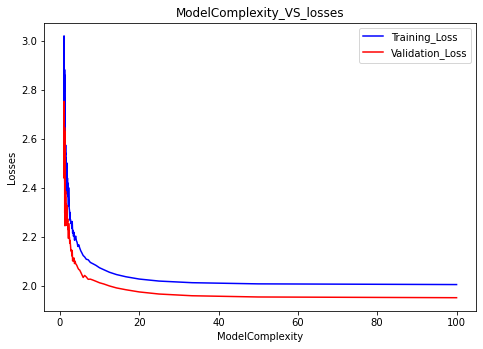

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.reciprocal(lamdas1),Final_DataFrame_L1[:]['MSE_Train_loss'],'-b', label='Training_Loss')
ax.plot(np.reciprocal(lamdas1),Final_DataFrame_L1[:]['MSE_val_loss'],'r', label='Validation_Loss')
ax.legend()
plt.title('ModelComplexity_VS_losses')
plt.xlabel('ModelComplexity')
plt.ylabel('Losses')

In [ ]:
print('Best Lamda ',lamdas1[np.argmin(Final_DataFrame_L1[:]['MSE_val_loss'])]) 
print('Minimum training loss(RMSE) : ', min(Final_DataFrame_L1[:]['MSE_Train_loss'])**0.5,'\nMinimum Validation Loss (RMSE) : ', min(Final_DataFrame_L1[:]['MSE_val_loss'])**0.5)
print('Corresponding Minimum NRMSE ', min(Final_DataFrame_L1[:]['validation_NRMSE']))
print('Corresponding weights considering minimum val loss\n',Final_DataFrame_L1.iloc[np.argmin(Final_DataFrame_L1[:]['MSE_val_loss']), 0:22])
wL1 = Final_DataFrame_L1.iloc[np.argmin(Final_DataFrame_L1[:]['MSE_val_loss']), 0:22]


Best Lamda  0.0
Minimum training loss(RMSE) :  1.4157182423815833 
Minimum Validation Loss (RMSE) :  1.396635997832915
Corresponding Minimum NRMSE  0.4635368943427311
Corresponding weights considering minimum val loss
 w0      0.534105
w1      0.102216
w2      0.446173
w3     -0.111255
w4      1.881284
w5      0.195610
w6     -0.399834
w7      0.240875
w8     -0.308185
w9     -0.248910
w10    -0.094676
w11    -0.277301
w12    -0.052459
w13     0.209487
w14    -0.020242
w15    -0.014212
w16    -0.048939
w17    -0.123366
w18    -0.210042
w19     0.282784
w20     0.036313
w21    30.273737
Name: 0.0, dtype: float64


# Best lamda for Pseudo Inverse

In [ ]:
lamdas3 = np.arange(0.0,10,0.01)  #getting an array of lamda value to try
Array_final_psd = np.ones((len(lamdas3),22+2))  #creating an array to store everything
for i,lamda in enumerate(lamdas3):
    Array_final_psd[i,:22] = Pseudo_Inverse(X_train,t_train,lamda)
    Array_final_psd[i,22] =  MSE_Loss(X_train,t_train,Pseudo_Inverse(X_train,t_train,lamda))  #storing mse loss trianing
    Array_final_psd[i,23] = MSE_Loss(X_val,t_val,Pseudo_Inverse(X_train,t_train,lamda))       #Storing  mse loss validation

In [ ]:
Final_DataFrame_psd = pd.DataFrame(Array_final_psd,lamdas3,['w'+str(i) for i in np.arange(22)]+['Validation_loss','Training_loss'])  #converting array to dataframe for convenience

In [ ]:
Final_DataFrame_psd.head(5) 

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w14,w15,w16,w17,w18,w19,w20,w21,Validation_loss,Training_loss
0.00,0.534151,0.102110,0.446167,-0.111232,1.881200,0.195741,-0.399835,0.240848,-0.307965,-0.249263,...,-0.020252,-0.014206,-0.048940,-0.123363,-0.210085,0.282818,0.036289,30.273737,2.004258,1.950624
0.01,0.534148,0.102112,0.446142,-0.111228,1.881165,0.195765,-0.399835,0.240849,-0.307967,-0.249263,...,-0.020250,-0.014206,-0.048939,-0.123361,-0.210084,0.282817,0.036292,30.273666,2.004258,1.950636
0.02,0.534145,0.102114,0.446117,-0.111224,1.881131,0.195790,-0.399835,0.240850,-0.307970,-0.249264,...,-0.020248,-0.014206,-0.048937,-0.123360,-0.210083,0.282816,0.036295,30.273595,2.004258,1.950649
0.03,0.534142,0.102116,0.446091,-0.111221,1.881096,0.195814,-0.399836,0.240851,-0.307972,-0.249265,...,-0.020247,-0.014206,-0.048936,-0.123358,-0.210081,0.282815,0.036298,30.273524,2.004258,1.950661
0.04,0.534139,0.102118,0.446066,-0.111217,1.881061,0.195838,-0.399836,0.240852,-0.307974,-0.249266,...,-0.020245,-0.014206,-0.048935,-0.123356,-0.210080,0.282814,0.036300,30.273453,2.004258,1.950674


C:\Users\mohit\AppData\Local\Temp/ipykernel_28752/2728661870.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  ax3.plot(np.reciprocal(lamdas3),Final_DataFrame_psd[:]['Validation_loss'],label='ValidationLoss')
C:\Users\mohit\AppData\Local\Temp/ipykernel_28752/2728661870.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  ax3.plot(np.reciprocal(lamdas3),Final_DataFrame_psd[:]['Training_loss'],label='TrainingLoss')


Text(0, 0.5, 'Losses')

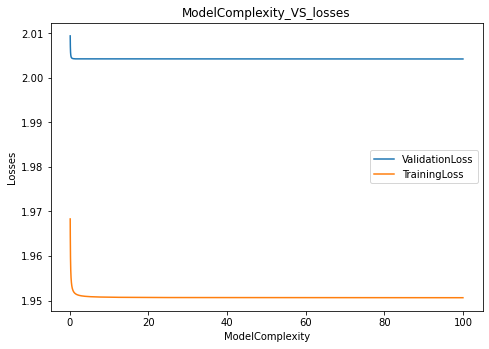

In [ ]:
fig3 = plt.figure()
ax3 =  fig3.add_axes([0,0,1,1])
ax3.plot(np.reciprocal(lamdas3),Final_DataFrame_psd[:]['Validation_loss'],label='ValidationLoss')
ax3.plot(np.reciprocal(lamdas3),Final_DataFrame_psd[:]['Training_loss'],label='TrainingLoss')
plt.legend()
plt.title('ModelComplexity_VS_losses')
plt.xlabel('ModelComplexity')
plt.ylabel('Losses')

In [ ]:
print('Best Lamda ',lamdas3[np.argmin(Final_DataFrame_psd[:]['Validation_loss'])])
print('Minimum training loss(RMSE) : ', min(Final_DataFrame_psd[:]['Validation_loss'])**0.5,'\nMinimum Validation Loss (RMSE) : ', min(Final_DataFrame_psd[:]['Training_loss'])**0.5)
print('Corresponding weights considering minimum val loss\n',Final_DataFrame_psd.iloc[np.argmin(Final_DataFrame_psd[:]['Validation_loss']), 0:22])
W_psd = Final_DataFrame_psd.iloc[np.argmin(Final_DataFrame_psd[:]['Validation_loss']), 0:22]
#Best_Lamda_psd = lamdas3[np.argmin(Final_DataFrame_psd[:]['Validation_loss'])]

Best Lamda  0.0
Minimum training loss(RMSE) :  1.4157182312047316 
Minimum Validation Loss (RMSE) :  1.3966473420169139
Corresponding weights considering minimum val loss
 w0      0.534151
w1      0.102110
w2      0.446167
w3     -0.111232
w4      1.881200
w5      0.195741
w6     -0.399835
w7      0.240848
w8     -0.307965
w9     -0.249263
w10    -0.094509
w11    -0.277373
w12    -0.052488
w13     0.209544
w14    -0.020252
w15    -0.014206
w16    -0.048940
w17    -0.123363
w18    -0.210085
w19     0.282818
w20     0.036289
w21    30.273737
Name: 0.0, dtype: float64


# Testing 

In [ ]:
df1 = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv')

In [ ]:
X_test = Normalize(df1).to_numpy()

In [ ]:
Predictions = Prediction(X_test,wL2)

In [ ]:
#pd.DataFrame(Predictions,columns=["Next_Tmax"]).to_csv('213170006_213170001.csv',index = False)  ##saving Predictions

Text(0.5, 1.0, 'TestPredictionSpread')

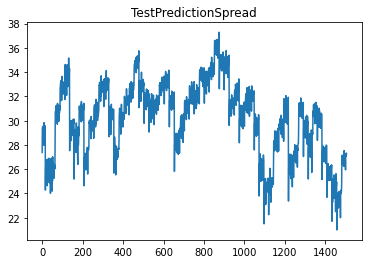

In [ ]:
plt.plot(Predictions) ##plotting Prediction to visulasing
plt.title('TestPredictionSpread')



Plotting best model prediction vs true values for validation data

Text(0, 0.5, 'NextTmax')

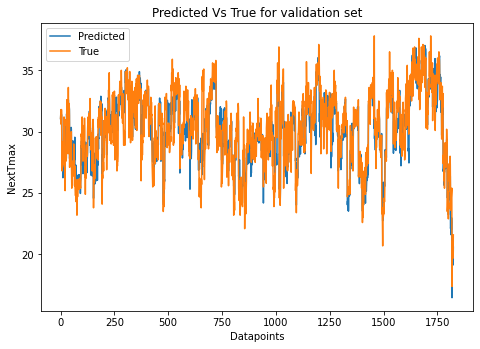

In [ ]:
Prediction_on_validation = Prediction(X_val,wL2)
fig4 = plt.figure()
ax4 =  fig4.add_axes([0,0,1,1])
ax4.plot(Prediction_on_validation,label = 'Predicted')
ax4.plot(t_val,label = 'True')
plt.legend()
plt.title('Predicted Vs True for validation set')
plt.xlabel('Datapoints')
plt.ylabel('NextTmax')

In [ ]:
'''We read about R2 and how we call it from here https://www.askpython.com/python/coefficient-of-determination'''

'We read about R2 and how we call it from here https://www.askpython.com/python/coefficient-of-determination'

In [ ]:
corr_matrix = np.corrcoef(t_val,Prediction_on_validation) 
corr = corr_matrix[0][1]
print('R2 for true and predicted value for validation set is :',corr)

R2 for true and predicted value for validation set is : 0.8873794480913091


# Observations

L2 Regularisation
best lamda  = 0.04
minimum validation loss = 1.3959536676310509


L1 Regularisation
Best lamda  0.0
minimum validation loss 1.396635997832915



Pseudo inverse
Best lamda  0
minimum validation loss   1.3966473420169139



Comparing all three minimum RMSE we can observe that validation losses are minimum for L2 regularised loss function with weights 
best_model weights =      
       [ 5.20643024e-01,  1.07936690e-01,  3.33866461e-01, -9.44809369e-02,
        1.72807420e+00,  3.06310552e-01, -4.00633825e-01,  2.45704554e-01,
       -3.19002083e-01, -2.52481079e-01, -1.07422826e-01, -2.65018672e-01,
       -4.84114263e-02,  2.13381905e-01, -1.21645595e-02, -1.45480378e-02,
       -4.29705919e-02, -1.15748534e-01, -2.05921894e-01,  2.80455780e-01,
        4.82073611e-02,  3.02737374e+01]



# Conclusion

1) an unique value of lamda is obtained where validation losses are minimum

2) an overall trend we witnessed is that traning and validation losses follow almost similiar trend that may be because problem is simple to learn for model

3) best lamda changes and is subjected to with what weights we start the iterations else we can also increase max_iter to reach similar weights

4) The validation MSE does not go below a certain value (2) no matter what number of iteration we do

5) best model can be found using L2 regualrised loss function 

6) the best lamda corresponding to best lamda is 0.04 but we also got 0.05 when we randomise our training sample

7) Best lamda is zero for L1 regularisation and pseudo inverse method which indicates there no need of regularisation in this cases

8) A complex model is proving to be better for both validation and training in terms of losses

9) With change in traning sample model change, and all other observation change as well

10) Best model seems to perform good on validation set looking at true and predicted plot


#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 

# References

In [ ]:
#For MAE Gradient : https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative 
## for understanding L2 and L1 loss ; http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/
## For plotting we took reference from an online course on udemy where we found it difficult
##https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib for figure size and all
##How to save file https://stackoverflow.com/questions/51878601/pandas-dataframe-to-csv-how-to-set-column-names
##pseudo inverse https://web.mit.edu/zoya/www/linearRegression.pdf
## We had discussions with our friends but we made sure to not share code

# Submitted by Ankur Kumar(213170001) & Mohit Punasiya(213170006)